In [1]:
!pip install langdetect emoticon-fix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=2ee93015ce1457f8a503419d5e8bfab9990c24e7908ddd75bdc39b0574da6219
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [23]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
import csv
import codecs
import sys
import io
import nltk
import unicodedata
import numpy as np

In [3]:
#For Classifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [4]:
#Different Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [5]:
#Python script for Confusion Matrix
from sklearn.metrics import *

In [19]:
#Emoticon
from emoticon_fix import emoticon_fix

def EmotToText(text):
  return emoticon_fix(text)

In [7]:
#For Stopword Removal
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize, TweetTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
#For Snowball Stemming
from nltk.stem.snowball import SnowballStemmer

In [9]:
#For language detection
from langdetect import detect

In [10]:
#For tokenization (imported TweetTokenizer)
tknzr = TweetTokenizer()

def performTkn(text):
  token = [tkn for tkn in tknzr.tokenize(text)]

  return (" ").join(token)

In [11]:
def performLangDetect(text):
  return detect(text)

In [12]:
def performAccent(text):
  asciitext = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode('utf-8')

  return asciitext

In [13]:
#Stopword Removal
def peformStopWordRemoval(text):
  text_tokens = word_tokenize(text)

  tokens_without_sw = [word for word in text_tokens if word.lower() not in stopwords.words()]
  stopWordRemovedText = (" ").join(tokens_without_sw)

  return stopWordRemovedText

In [14]:
#Stemming
snow_stemmer = SnowballStemmer(language='english')

def peformStemming(text):
  wordTok = word_tokenize(text)

  stemming = [snow_stemmer.stem(word) for word in wordTok]
  stemmedText = (" ").join(stemming)

  return stemmedText

## **Data Preprocessing Module**
Preprocess text with emoticon conversion, stemming, stopword removal, and tokenization.

    Args:
        text (str): Input text.
    Returns:
        str: Preprocessed text.

In [37]:
def preProcessingModule(text):
  getEmotText = EmotToText(text)
  getStemmedText = peformStemming(getEmotText)
  getStopWordRemovedText = peformStopWordRemoval(getStemmedText)
  getAccent = performAccent(getStopWordRemovedText)
  getTkn = performTkn(getAccent)
  getLang = performLangDetect(text)

  final_out = getTkn

  # print(getLang)

  return final_out

## **Train Dataset Loader**

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-64-c0ee617aaaa6>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_bar_train = sns.barplot(


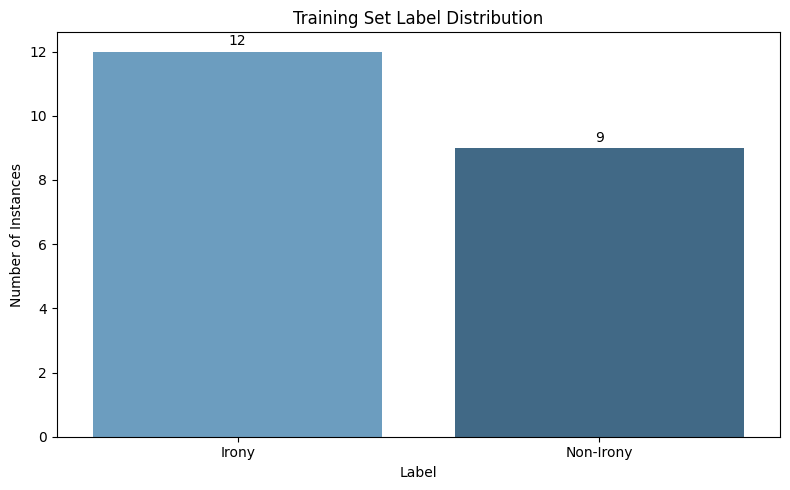

<ipython-input-64-c0ee617aaaa6>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_bar_test = sns.barplot(


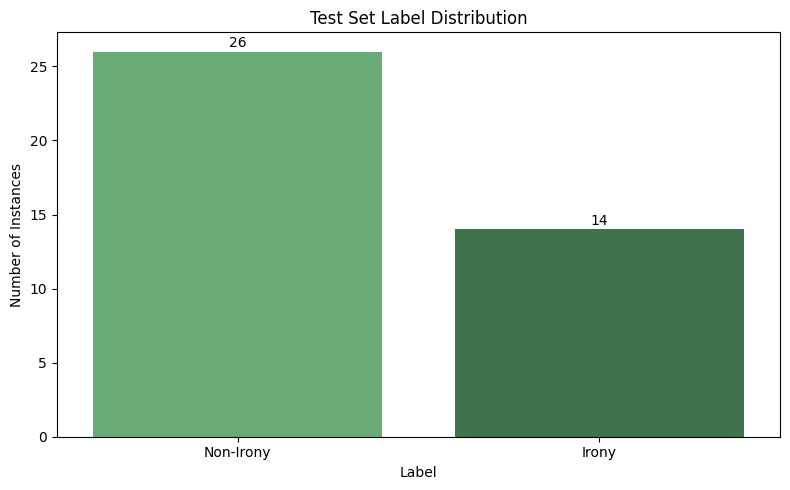

Confusion Matrix: 
[[12  2]
 [15 11]]
Macro-Average Recall Score:  0.6401098901098901
Macro-Average Precision Score:  0.6452991452991452
Macro-Average F1-Score:  0.5747342088805503
Accuracy:  0.575
Evaluation Report: 
              precision    recall  f1-score   support

       Irony       0.44      0.86      0.59        14
   Non-Irony       0.85      0.42      0.56        26

    accuracy                           0.57        40
   macro avg       0.65      0.64      0.57        40
weighted avg       0.71      0.57      0.57        40



In [64]:
def main():
  """Training dataset loader"""
  tweets = []
  label = []
  csv.field_size_limit(500 * 1024 * 1024)
  with open('/content/drive/MyDrive/Colab Notebooks/IronyDetectionSmall_TrainDataset.txt', 'r') as f:
    next(f)
    reader=csv.reader(f, dialect="excel-tab")
    for line in reader:
      #print(line[2])
      preProcessedTweetText= preProcessingModule(line[2])
      # print(preProcessedTweetText)
      tweets.append(preProcessedTweetText)
      if (line[1] == "1"):
        label.append("Irony")
      else:
        label.append("Non-Irony")

    #print(label)

  #Converting list to array
  X_train = np.array(tweets)
  Y_train = np.array(label)

  # print()
  # print(X_train)
  # print()
  # print(Y_train)
  # print()

  #Define Classifier / Extracting Features
  #CountVectorizer - scikit-learn's bag of words tool
  classifier = Pipeline([ #Pipeline- all 3 segments are combined into a single module
    ('count_vectorizer', CountVectorizer(ngram_range=(1, 3))), #CountVectorizer- Convert document into word matrix using only TF
    ('tfidf', TfidfTransformer(norm = 'l1', use_idf = True, smooth_idf= True)), #Using IDF; smooth_IDF to eliminate division by zero error
    ('clf', MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=2e-5, batch_size='auto', learning_rate_init=0.001, max_iter=200))])

  """
  L2 norm - ensures that the sum of the squares of the vector elements equals 1
  """

  #Train (fit) Classifier
  """
  fit- runs through each step in the Pipeline sequentially, applying transformations
  and finally fitting the classifier
  """
  classifier.fit(X_train, Y_train)

  """Test dataset loader"""

  testTweets = []
  testLabelGold = [] #True labels
  csv.field_size_limit(500 * 1024 * 1024)
  with open('/content/drive/MyDrive/Colab Notebooks/IronyDetectionSmall_TestDataset.txt', 'r') as f:
    next(f)
    reader=csv.reader(f, dialect="excel-tab")
    for line in reader:
      #print(line[2])
      preProcessedTweetText= preProcessingModule(line[2])
      #print(preProcessedTweetText)
      testTweets.append(preProcessedTweetText)
      if (line[1] == "1"):
        testLabelGold.append("Irony")
      else:
        testLabelGold.append("Non-Irony")

  #test_label_prediction
  X_test = np.array(testTweets)
  testLabelPredicted = classifier.predict(X_test) #Predicted labels
  #print(testLabelPredicted)
  """
  Classifier- model that has been trained to recognize patterns and make predictions

  predict- method of classifier that takes input data and outputs the predicted labels
  """

  # --- Training Label Distribution ---
  train_label_counts = Counter(label)
  plt.figure(figsize=(8, 5))
  sns_bar_train = sns.barplot(
      x=list(train_label_counts.keys()),
      y=list(train_label_counts.values()),
      palette="Blues_d"
  )
  plt.title("Training Set Label Distribution")
  plt.xlabel("Label")
  plt.ylabel("Number of Instances")

  # Add counts on top of bars with adjusted spacing
  for i, count in enumerate(train_label_counts.values()):
      sns_bar_train.text(
          i,
          count + 0.1,  # Slight vertical offset to avoid overlap
          str(count),
          ha='center',
          va='bottom',
          fontsize=10
      )

  plt.tight_layout()
  plt.show()

  # --- Test Label Distribution ---
  test_label_counts = Counter(testLabelGold)
  plt.figure(figsize=(8, 5))
  sns_bar_test = sns.barplot(
      x=list(test_label_counts.keys()),
      y=list(test_label_counts.values()),
      palette="Greens_d"
  )
  plt.title("Test Set Label Distribution")
  plt.xlabel("Label")
  plt.ylabel("Number of Instances")

  # Add counts on top of bars with adjusted spacing
  for i, count in enumerate(test_label_counts.values()):
      sns_bar_test.text(
          i,
          count + 0.1,  # Slight vertical offset to avoid overlap
          str(count),
          ha='center',
          va='bottom',
          fontsize=10
      )

  plt.tight_layout()
  plt.show()

  #Evaluation (2D Matrix)
  results = confusion_matrix(testLabelGold, testLabelPredicted)

  print('Confusion Matrix: ')
  print(results)

  print('Macro-Average Recall Score: ', recall_score(testLabelGold, testLabelPredicted, average = 'macro'))
  print('Macro-Average Precision Score: ', precision_score(testLabelGold, testLabelPredicted, average= 'macro'))
  print('Macro-Average F1-Score: ', f1_score(testLabelGold, testLabelPredicted, average= 'macro'))
  print('Accuracy: ', accuracy_score(testLabelGold, testLabelPredicted))

  print('Evaluation Report: ')
  print(classification_report(testLabelGold, testLabelPredicted))

if __name__ == '__main__':
  main()